# LCP module B - exercise 02
### Francesco Pio Barone
#### AY 2021/22, UniPD

In [1]:
try:
    import cayde_env # importing a custom environment for my server
    cayde_env.tensorflow('CPU')
except: print('no need of custom environment')

from keras.models import Sequential  # simplest NN
from keras.layers import Dense, Dropout  # normal neural layers
from keras import utils

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

 [ CAYDE computing env ]
[tf] CPU set

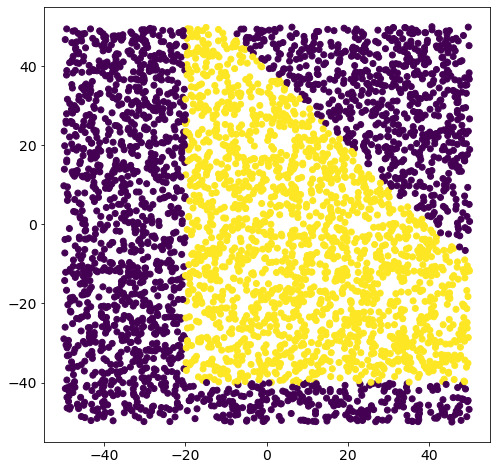

In [2]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim of a sample
L = len(x[0])

# number of data in train set
N_train = int(perc_train*N)

plt.figure(figsize = (8,8))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [3]:
x_train, y_train = x[0:N_train], y[0:N_train]  # there were brackets (,) = (,)
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:",len(x_train),'\tValidation:',len(x_valid))

Train: 3200 	Validation: 800


In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [5]:
np.random.seed(12345)

CASE = 1

if CASE == 1:
    model = Sequential()  # use the sequential Keras
    model.add( Dense(L, input_shape=(L,), activation='relu'))  # first layer
    #           ^ connect every point of the layer
    model.add( Dense(20, activation='relu'))
    model.add( Dense(20, activation='relu'))
    model.add( Dropout(0.2) )
    model.add( Dense(1, activation='sigmoid') )
    nepoch = 400
if CASE==2:
    model = Sequential()  # use the sequential Keras
    model.add( Dense(L, input_shape=(L,), activation='relu'))  # first layer
    model.add( Dense(3, activation='sigmoid') )
    model.add( Dense(1, activation='sigmoid') )
if CASE == 3: # bigger NN!
    model = Sequential()  # use the sequential Keras
    model.add( Dense(L, input_shape=(L,), activation='relu'))  # first layer
    #           ^ connect every point of the layer
    model.add( Dense(2000, activation='relu'))
    model.add( Dense(2000, activation='relu'))
    model.add( Dropout(0.2) )
    model.add( Dense(1, activation='sigmoid') )
    nepoch = 400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


2022-03-10 15:47:53.334914: E tensorflow/stream_executor/rocm/rocm_driver.cc:993] could not retrieve ROCM device count: HIP_ERROR_NoDevice
2022-03-10 15:47:53.335752: E tensorflow/stream_executor/rocm/rocm_driver.cc:993] could not retrieve ROCM device count: HIP_ERROR_NoDevice


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 50,
                validation_data = (x_valid, y_valid),
                verbose = 2)

Epoch 1/400
64/64 - 0s - loss: 0.1609 - accuracy: 0.9391 - val_loss: 0.1459 - val_accuracy: 0.9463 - 45ms/epoch - 703us/step
Epoch 2/400
64/64 - 0s - loss: 0.1565 - accuracy: 0.9444 - val_loss: 0.1443 - val_accuracy: 0.9463 - 37ms/epoch - 575us/step
Epoch 3/400
64/64 - 0s - loss: 0.1593 - accuracy: 0.9441 - val_loss: 0.1401 - val_accuracy: 0.9475 - 35ms/epoch - 551us/step
Epoch 4/400
64/64 - 0s - loss: 0.1535 - accuracy: 0.9431 - val_loss: 0.1410 - val_accuracy: 0.9488 - 35ms/epoch - 539us/step
Epoch 5/400
64/64 - 0s - loss: 0.1609 - accuracy: 0.9409 - val_loss: 0.1377 - val_accuracy: 0.9488 - 35ms/epoch - 544us/step
Epoch 6/400
64/64 - 0s - loss: 0.1563 - accuracy: 0.9438 - val_loss: 0.1406 - val_accuracy: 0.9500 - 36ms/epoch - 566us/step
Epoch 7/400
64/64 - 0s - loss: 0.1561 - accuracy: 0.9447 - val_loss: 0.1457 - val_accuracy: 0.9475 - 35ms/epoch - 554us/step
Epoch 8/400
64/64 - 0s - loss: 0.1632 - accuracy: 0.9378 - val_loss: 0.1503 - val_accuracy: 0.9438 - 35ms/epoch - 541us/step


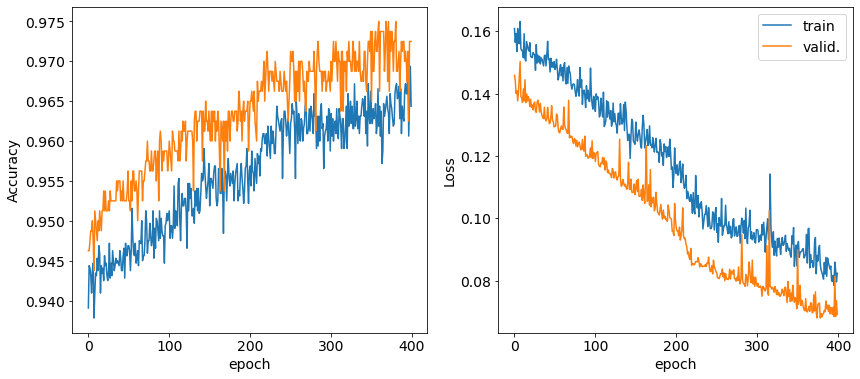

In [12]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [13]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


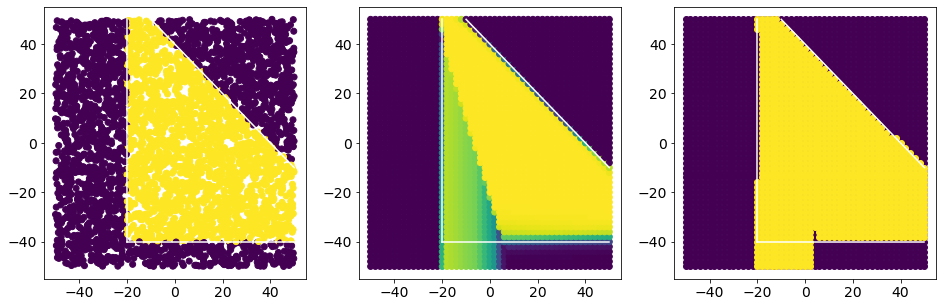

In [14]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show()

End of file